In [1]:
#Importing required libraries

#For data preprocessing
import pandas as pd
from textblob import TextBlob #
import re
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

#For data Visualization
import matplotlib.pyplot as plt



In [2]:
#Load data
train = pd.read_csv('train.csv')

In [3]:
train.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [4]:
#Drop id feature that is not required
train.drop('id', axis=True, inplace=True)

In [5]:
train.label.value_counts(normalize=True)

0    0.929854
1    0.070146
Name: label, dtype: float64

In [6]:
def text_process(data): #function to remove Special characters like @#[]()!
    tweet_blob = TextBlob(data)
    words = tweet_blob.words
    sent = ' '.join(words)
    return sent 

In [7]:
train.tweet = train.tweet.apply(text_process)

In [8]:
def remove_junk(data): #function to keep only characters and remove 'user'- which is not required 
    words=[words for words in data.split() if words != 'user']    
    clean_tokens = [t for t in words if re.match(r'[^\W\d]*$', t)] # Remove punctuations')]
    sent_join  = ' '.join(clean_tokens)
    return sent_join

In [9]:
train.tweet=train.tweet.apply(remove_junk)

In [10]:
# Remove stopwords
train['tweet'] = train['tweet'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

In [11]:
train.head()

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit ca use cause offer wheelcha...
2,0,bihday majesty
3,0,model love u take u time
4,0,factsguide society motivation


In [12]:
#Lemmatizing the words
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

In [14]:
train.tweet = train.tweet.apply(lemmatize_text) 

In [15]:
train.head()

,label,tweet
0,0,father dysfunctional selfish drag kid dysfunct...
1,0,thanks lyft credit ca use cause offer wheelcha...
2,0,bihday majesty
3,0,model love u take u time
4,0,factsguide society motivation


In [16]:
#Dependent and independent featuere
X= train['tweet']
y=train['label']

In [17]:
#Import models and metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

In [18]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

#### Models Pipeline 

In [19]:
pipe_nb = Pipeline(steps=[('tf', TfidfVectorizer()), ('NB', MultinomialNB())])

# Create Parameter Grid
pgrid_mnnb = {
 'tf__max_features' : [1000, 2000, 3000],
#  'tf__stop_words' : ['english', None],
 'tf__ngram_range' : [(1,1),(1,2)],
 'tf__use_idf' : [True, False],
 'NB__alpha' : [0.1, 0.5, 1]
}

# Apply GridSearch to Pipeline to find the best parameters
gs_mnnb = GridSearchCV(pipe_nb, pgrid_mnnb, cv=5, n_jobs=-1, verbose=2)

In [20]:
# Fit the model
gs_mnnb.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('NB', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'NB__alpha': [0.1, 0.5, 1],
                         'tf__max_features': [1000, 2000, 3000],
                         'tf__ngram_range': [(1, 1), (1, 2)],
                         'tf__use_idf': [True, False]},
             verbose=2)

In [21]:
#check the best parameter for the model
gs_mnnb.best_params_

{'NB__alpha': 0.1,
 'tf__max_features': 3000,
 'tf__ngram_range': (1, 1),
 'tf__use_idf': True}

In [30]:
print('Train score: ', gs_mnnb.score(x_train, y_train))
print('Test score: ', gs_mnnb.score(x_test, y_test))

Train score:  0.9626215009803513
Test score:  0.9570767113002128


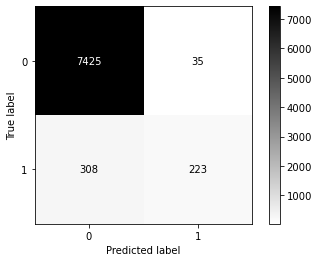

In [23]:
cm = plot_confusion_matrix(gs_mnnb, x_test, y_test, cmap=plt.cm.gist_yarg)

In [24]:
lg = Pipeline(steps=[('tf', TfidfVectorizer()), ('LR', LogisticRegression())])

# Create Parameter Grid
pgrid_lr = {
 'tf__max_features' : [1000, 2000, 3000],
#  'tf__stop_words' : ['english', None],
 'tf__ngram_range' : [(1,1),(1,2)],
 'tf__use_idf' : [True, False],
 'LR__C' : [10, 1.0, 0.1, 0.01],
    'LR__max_iter':[100,200,500],
    'LR__penalty':['l1', 'l2']
}

# Apply GridSearch to Pipeline to find the best parameters
gs_lr = GridSearchCV(lg, pgrid_lr, cv=5, n_jobs=-1, verbose=2)


In [25]:
gs_lr.fit(x_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\Users\91784\.conda\envs\H_review\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.94797874 0.94793702 0.947061   0.9472696  0.95356891 0.95402775
 0.95098245 0.951191   0.95653078 0.95648907 0.95486212 0.95473701
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.94797874 0.94793702 0.94710272 0.94722788 0.95361063 0.95406946
 0.95102417 0.951191   0.9565725  0.95653078 0.95486212 0.95469529
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.94797874 0.94793702 0.94710272 0.94722788 0.95361063 0.95406946
 0.95102417 0.951191   0.9565725  0.95653078 0.95486212 0.95469529
        nan        nan        nan        n

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('LR', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'LR__C': [10, 1.0, 0.1, 0.01],
                         'LR__max_iter': [100, 200, 500],
                         'LR__penalty': ['l1', 'l2'],
                         'tf__max_features': [1000, 2000, 3000],
                         'tf__ngram_range': [(1, 1), (1, 2)],
                         'tf__use_idf': [True, False]},
             verbose=2)

In [26]:
gs_lr.best_params_

{'LR__C': 10,
 'LR__max_iter': 200,
 'LR__penalty': 'l2',
 'tf__max_features': 3000,
 'tf__ngram_range': (1, 1),
 'tf__use_idf': True}

In [27]:
print('Train score: ', gs_lr.score(x_train, y_train))
print('Test score: ', gs_lr.score(x_test, y_test))

Train score:  0.9741354136247966
Test score:  0.9572018520835941


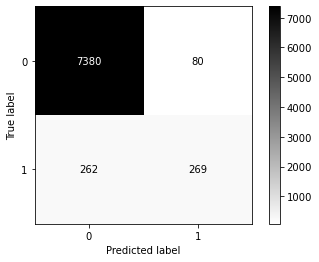

In [28]:
cm_lr = plot_confusion_matrix(gs_lr, x_test, y_test, cmap=plt.cm.gist_yarg)

In [ ]:
### Word2Vec

In [ ]:
from gensim.models import word2vec

In [ ]:
train['tweet'].tolist()